# Linear Regression

Linear regression is a supervised learning method to model de relationship between a dependent variable and one or more independent variables.
Consider the general relationship between independent variables X, dependent variables Y, and some unknown parameters $\theta$:

$Y = f(X, \theta)$,

where the regression function $f(\cdot)$ is typically prescribed and the parameters $\theta$ are found by optimizing this function to match the data.
That is, the objective is to adjust the parameters $\theta$ in order to make $f(X, \theta)$ as close as possible to $Y$.

## Least Squares Fitting

The idea is to use a simple function to describe a trend by minimizing the the sum-square error between the selected function $f(\cdot)$ and its fit to the data.
Classical curve fitting is formulated as a simple solution of $y = X\theta$.

Consider a data set comprising $N$ data points:

$\lbrace y_i, x_{i1}, x_{i2}, \dots, x_{ip} \rbrace_{i=1}^N$,

where $y_i$ is the $i$-th sample of the dependent variable (also known as target variable), $x_{ij}$ is the $i$-th sample of the $j$-th component of the independent variable (also known as feature sample), and $p$ is the number of parameters.

Assume now that a linear relationship between the dependent variable, $y$, and the features, $x$, modeled as

$y_i = \theta_0 + \theta_1 x_{i1} + \dots +  \theta_p x_{ip} + \eta_i$, (1)

where $\theta_i$ is the $i$-th model parameter, and $\eta_i$ is the $i$-th disturbance sample.

Using matrix notation, (1) may be rewritten as:

$y = X\theta + \eta$,

where $y = [ y_1, y_2, \dots, y_n ]^T$ is the target vector, $\theta = [\theta_0, \theta_1, \dots, \theta_n]^T$ is the parameter vector, $X = \begin{bmatrix} 1 & x_{11} & \dots &  x_{1p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \dots &  x_{np} \end{bmatrix}$ is the feature matrix, and $\eta = [\eta_0, \eta_1, \dots, \eta_n]^T$ is the disturbance vector.

A predictor for $y_i$ is given by

$\hat y_i = \hat\theta_0 + \hat\theta_1 x_{i1} + \dots +  \hat\theta_p x_{ip}$

and rewritten using matrix notation as

$\hat y = X\hat\theta = f(X,\hat\theta)$, (2) 

where $f(X,\hat\theta)$ is the also know as hypothesis function.

The idea is to find an estimate for $\hat\theta$ in order to make the predicted target vector $\hat y$ as close as possible to the measured target vector $y$ (prediction error in system identification).
A common metric to be used in this case is the $l_2$ (least-squares) norm.
In this case, the optimization problem is formulated as

$E_2(\hat y) = \left( \frac{1}{N} \sum_{k=1}^N \lvert \hat y_k - y_k \rvert^2 \right)^{1/2}$,

which can be rewritten replacing (2) int it, arriving to

$$
\begin{align}
    E_2(f(X,\hat\theta)) &= \left( \frac{1}{N} \sum_{k=1}^N \lvert f(X_k,\hat\theta) - y_k \rvert^2 \right)^{1/2} \\
    E_2(\hat\theta) &= \left( \frac{1}{N} \sum_{k=1}^N \lvert X_k\hat\theta - y_k \rvert^2 \right)^{1/2}
\end{align}
$$

There is a closed-form solution that minimizes that cost function, it is called the normal equation and is given by

$\hat\theta = \left(X^T X\right)^{-1} X^T y$.

Below follows a simple example to estimate the parameters vector $\hat\theta$ using the normal equation (using the numpy library) and using the scikit-learn library (which uses the pseudo-inverse to compute the parameters vector).

Ideal parameters:	[4.0, 3.0]
Estimated parameters using the normal equation:	[4.586, 2.9216]
Estimated parameters using scikit-learn:	[4.586, 2.9216]


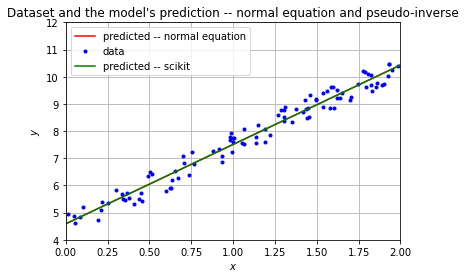

In [4]:
%matplotlib inline
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
from main.supervised_learning.linear_regression import linear_regression

lin_reg = linear_regression.LinearRegression()

# Generating the data
N = 100                             # Number of samples
np.random.seed(12345)               # Seed to simulate always the same data
x = 2*np.random.rand(N,1)           # Input
eta = np.random.rand(N,1)           # Noise
y = 4 + 3*x + eta                   # Output affected by noise
theta_0 = np.array([[4.0], [3.0]])  # Desired parameters

# Estimated parameters using the normal equation
theta = lin_reg.normal_equation(x, y)
theta_scikit = lin_reg.linear_regression(x, y)

# Generating the predicted output
_x = np.array([[0], [2]])       # x axis varies from 0 to 2
X = np.c_[np.ones((2,1)), _x]        # X's first column equals 1
y_pred = X.dot(theta)
y_pred_scikit = X.dot(theta_scikit)

print(f"Ideal parameters:\t{theta_0.squeeze().tolist()}")
print(f"Estimated parameters using the normal equation:\t{theta.round(4).squeeze().tolist()}")
print(f"Estimated parameters using scikit-learn:\t{theta_scikit.round(4).squeeze().tolist()}")

# Ploting the data and the model's prediction
plt.plot(_x, y_pred, '-r', label='predicted -- normal equation')
plt.plot(x, y, 'b.', label='data')
plt.plot(_x, y_pred_scikit, '-g', label='predicted -- scikit')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0,2,4,12])
plt.grid(True)
plt.legend(loc='upper left')
plt.title("Dataset and the model's prediction -- normal equation and pseudo-inverse")
plt.show()

